C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_17404\3152212867.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_17404\3152212867.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf['blok']):
C:\Users\HP ELITEBOOK\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


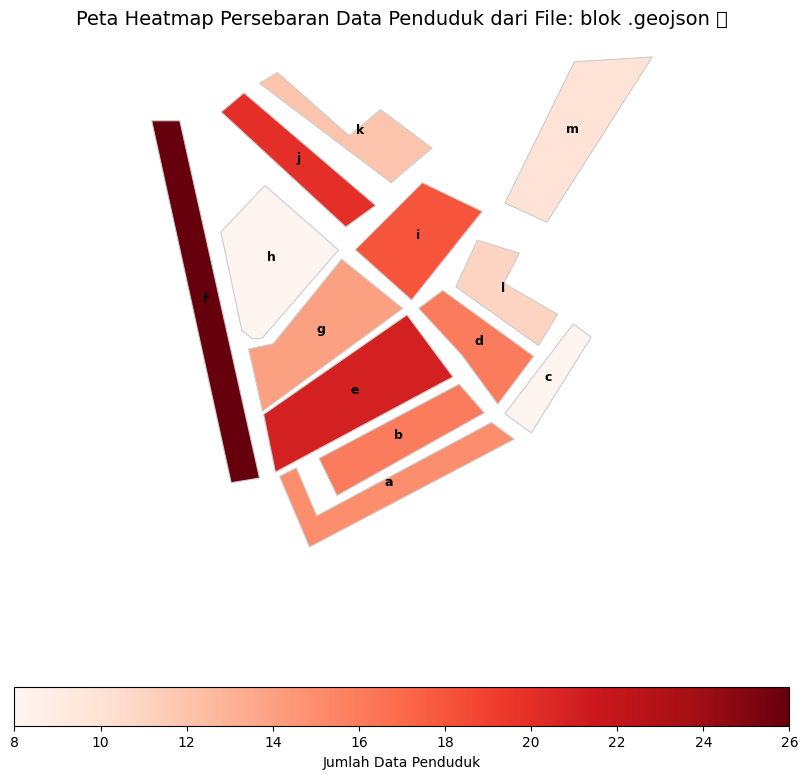

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- LANGKAH 1: TENTUKAN LOKASI FILE LOKAL ANDA ---
# Ganti nama file jika berbeda dari yang Anda unggah ("blok .geojson")
file_path = r'C:\Users\HP ELITEBOOK\Downloads\blok .geojson'

try:
    # 2. MEMUAT DATA DARI FILE LOKAL
    # Perintah ini akan membaca file GeoJSON dari path yang ditentukan
    gdf = gpd.read_file(file_path)

    # 3. MENYIAPKAN PLOT DAN MEMBUAT HEATMAP (CHOROPLETH)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Membuat Choropleth Map berdasarkan kolom 'data penduduk'
    gdf.plot(
        column='data penduduk', 
        cmap='Reds', 
        linewidth=0.8, 
        ax=ax, 
        edgecolor='0.8', 
        legend=True,
        legend_kwds={
            'label': "Jumlah Data Penduduk",
            'orientation': "horizontal"
        }
    )

    # 4. MENAMBAHKAN LABEL BLOK
    # Menghitung centroid untuk posisi label
    gdf['centroid'] = gdf.geometry.centroid
    for x, y, label in zip(gdf.centroid.x, gdf.centroid.y, gdf['blok']):
        ax.text(x, y, label, fontsize=9, ha='center', color='black', fontweight='bold')

    # 5. MENGATUR TAMPILAN
    ax.set_title(f'Peta Heatmap Persebaran Data Penduduk dari File: {file_path.split("\\")[-1]} 📍', fontsize=14)
    ax.set_axis_off() 

    # 6. MENAMPILKAN PLOT
    plt.show()

except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di jalur: {file_path}")
    print("Pastikan file 'blok .geojson' ada di direktori yang benar.")
except Exception as e:
    print(f"Terjadi error saat memproses file: {e}")

C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_17404\3931599127.py:39: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_blok['centroid'] = gdf_blok.geometry.centroid
C:\Users\HP ELITEBOOK\AppData\Local\Temp\ipykernel_17404\3931599127.py:40: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_blok.centroid.x, gdf_blok.centroid.y, gdf_blok['blok']):
C:\Users\HP ELITEBOOK\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


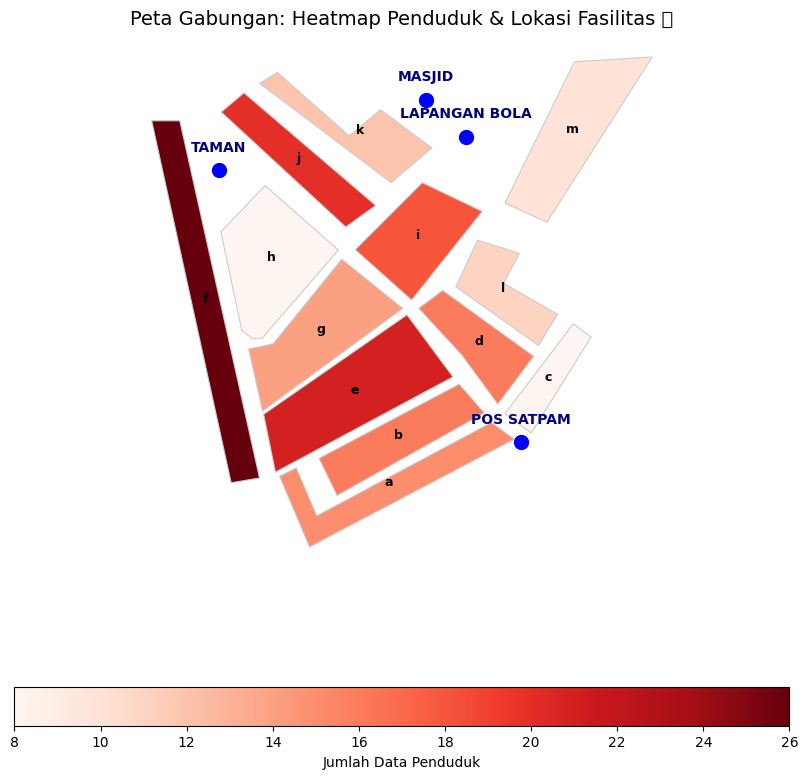

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import io
# Import 'sys' untuk keluar jika ada error dan 'os' untuk path yang lebih robust (dihapus untuk kesederhanaan, tetapi penting untuk penanganan error lokal)

# --- 1. TENTUKAN LOKASI FILE LOKAL ANDA ---
# Pastikan nama file dan path ini SAMA PERSIS dengan di komputer Anda.
geojson_blok_path = r'C:\Users\HP ELITEBOOK\Downloads\blok .geojson'
geojson_tempat_path = r'C:\Users\HP ELITEBOOK\Downloads\nama tempat.geojson'

try:
    # 2. MEMUAT DATA DARI FILE LOKAL
    # Membaca data blok (Polygon)
    gdf_blok = gpd.read_file(geojson_blok_path)
    
    # Membaca data nama tempat (Point)
    gdf_tempat = gpd.read_file(geojson_tempat_path)

    # 3. MENYIAPKAN PLOT DAN MEMBUAT HEATMAP (CHOROPLETH)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # --- Bagian A: Plot Heatmap Blok (Latar Belakang) ---
    gdf_blok.plot(
        column='data penduduk', 
        cmap='Reds', 
        linewidth=0.8, 
        ax=ax, 
        edgecolor='0.8', 
        legend=True,
        legend_kwds={
            'label': "Jumlah Data Penduduk",
            'orientation': "horizontal"
        },
        zorder=1 # Lapisan paling bawah
    )

    # 4. MENAMBAHKAN LABEL BLOK
    # Menghitung centroid untuk posisi label
    gdf_blok['centroid'] = gdf_blok.geometry.centroid
    for x, y, label in zip(gdf_blok.centroid.x, gdf_blok.centroid.y, gdf_blok['blok']):
        ax.text(x, y, label, fontsize=9, ha='center', color='black', fontweight='bold', zorder=2)
    
    # --- Bagian B: Tambahkan Titik dan Label Nama Tempat ---
    
    # 4b. Plot Titik Fasilitas (Penanda seragam)
    gdf_tempat.plot(
        ax=ax, 
        marker='o',             # Penanda lingkaran
        markersize=100,         # Ukuran penanda
        color='blue',           # Warna penanda seragam (tidak ingin beda warna)
        zorder=3                # Lapisan di atas heatmap
    )
    
    # 4c. Menambahkan Label Teks Fasilitas
    for x, y, label in zip(gdf_tempat.geometry.x, gdf_tempat.geometry.y, gdf_tempat['nama']):
        # Tambahkan label di atas titik
        ax.text(
            x, 
            y + 0.0001, # Menggeser label sedikit ke atas
            label.upper(), 
            fontsize=10, 
            fontweight='bold', 
            ha='center',
            color='navy', # Warna teks label yang menonjol
            zorder=4
        )

    # 5. MENGATUR TAMPILAN
    ax.set_title(f'Peta Gabungan: Heatmap Penduduk & Lokasi Fasilitas 📍', fontsize=14)
    ax.set_axis_off() 

    # 6. MENAMPILKAN PLOT
    plt.show()

except FileNotFoundError:
    print(f"ERROR: Salah satu file tidak ditemukan. Pastikan file 'blok .geojson' dan 'nama tempat.geojson' ada di direktori yang benar.")
except Exception as e:
    print(f"Terjadi error saat memproses file: {e}")